In [90]:
import pandas as pd
df27=pd.read_excel("/Users/alperendavran/Dropbox/Pure_Summer_2023/Data/processed_data/updated_cv(09.08)/cv_27period_coded.xlsx")
tm27=pd.read_excel("/Users/alperendavran/Dropbox/Pure_Summer_2023/Data/topic_modeling/final_version/27#TOPICSwS(1).xlsx")
df26=pd.read_excel("/Users/alperendavran/Dropbox/Pure_Summer_2023/Data/processed_data/updated_cv(09.08)/cv_26period_coded.xlsx")
tm26=pd.read_excel("/Users/alperendavran/Dropbox/Pure_Summer_2023/Data/topic_modeling/final_version/26#TOPICSwS(1).xlsx")
df24=pd.read_excel("/Users/alperendavran/Dropbox/Pure_Summer_2023/Data/processed_data/cv_24period_coded-2.xlsx")
tm24=pd.read_excel("/Users/alperendavran/Dropbox/Pure_Summer_2023/Data/topic_modeling/final_version/24#TOPICSwS(1).xlsx")

In [91]:
sex_party_number_speech_count24 = tm24.groupby(['vekil_party', 'sex'])['vekil_name'].nunique().reset_index(name='#MPs') 
sex_party_number_speech_count26 = tm26.groupby(['vekil_party', 'sex'])['vekil_name'].nunique().reset_index(name='#MPs')
sex_party_number_speech_count27 = tm27.groupby(['vekil_party', 'sex'])['vekil_name'].nunique().reset_index(name='#MPs')

In [92]:
sex_party_speech_count24 = tm24.groupby(['vekil_party', 'sex']).size().reset_index(name='#Speech')
sex_party_speech_count26 = tm26.groupby(['vekil_party', 'sex']).size().reset_index(name='#Speech') 
sex_party_speech_count27 = tm27.groupby(['vekil_party', 'sex']).size().reset_index(name='#Speech')

In [93]:
sex_party_mp_count24 = df24.groupby(['vekil_party', 'sex']).size().reset_index(name='count')
sex_party_mp_count26 = df26.groupby(['vekil_party', 'sex']).size().reset_index(name='count')
sex_party_mp_count27 = df27.groupby(['vekil_party', 'sex']).size().reset_index(name='count')

In [94]:
party_mp_count24 = df24.groupby(['vekil_party'])['vekil_name'].size().reset_index(name='count')
party_mp_count26 = df26.groupby(['vekil_party'])['vekil_name'].size().reset_index(name='count')
party_mp_count27 = df27.groupby(['vekil_party'])['vekil_name'].size().reset_index(name='count')


In [95]:
party_mp_count27['count'].sum()

600

In [96]:
import numpy as np

def women_percentage(df, row):
    try:
        men = df.loc[(df["vekil_party"] == row["vekil_party"]) & (df["sex"] == "erkek"), "count"].values[0]
        women = df.loc[(df["vekil_party"] == row["vekil_party"]) & (df["sex"] == "kadin"), "count"].values[0]
        return (women / (men + women)) *100
    except IndexError:
        return np.nan

In [97]:
sex_party_mp_count24["women_percentage"] = sex_party_mp_count24.apply(lambda row: women_percentage(sex_party_mp_count24, row), axis=1)
women_percentage24=sex_party_mp_count24.loc[:, ["vekil_party", "women_percentage"]].drop_duplicates()
women_percentage24=women_percentage24.dropna().sort_values("women_percentage", ascending= False)

In [98]:
sex_party_mp_count26["women_percentage"] = sex_party_mp_count26.apply(lambda row: women_percentage(sex_party_mp_count26, row), axis=1)
women_percentage26=sex_party_mp_count26.loc[:, ["vekil_party", "women_percentage"]].drop_duplicates()
women_percentage26=women_percentage26.dropna().sort_values("women_percentage", ascending= False)

In [99]:
sex_party_mp_count27["women_percentage"] = sex_party_mp_count27.apply(lambda row: women_percentage(sex_party_mp_count27, row), axis=1)
women_percentage27=sex_party_mp_count27.loc[:, ["vekil_party", "women_percentage"]].drop_duplicates()
women_percentage27=women_percentage27.dropna().sort_values("women_percentage", ascending= False)

In [100]:
women_percentage24.loc[(women_percentage24["vekil_party"]!="BAĞIMSIZ")]

,vekil_party,women_percentage
9,HDP,31.250000
0,AK Parti,14.779874
5,CHP,13.953488
13,MHP,5.769231


In [101]:
women_percentage26.loc[(women_percentage26["vekil_party"]!="BAĞIMSIZ")]

,vekil_party,women_percentage
7,HDP,32.692308
4,CHP,14.503817
0,AK Parti,10.725552
10,MHP,8.571429


In [102]:
women_percentage27

,vekil_party,women_percentage
7,HDP,39.062500
12,TİP,25.000000
0,AK Parti,19.047619
4,CHP,11.971831
9,MHP,8.163265
14,İYİ Parti,5.128205


In [103]:
sex_party_speech_count24

,vekil_party,sex,#Speech
0,AK Parti,erkek,34583
1,AK Parti,kadin,2344
2,AnaParti,kadin,208
3,BAĞIMSIZ,erkek,509
4,BAĞIMSIZ,kadin,91
5,CHP,erkek,39144
6,CHP,kadin,3563
7,DBP,kadin,43
8,HDP,erkek,14662
9,HDP,kadin,2194


In [104]:
sex_party_speech_count24 = pd.merge(sex_party_number_speech_count24, sex_party_speech_count24, on=['vekil_party', 'sex'])
sex_party_speech_count26 = pd.merge(sex_party_number_speech_count26, sex_party_speech_count26, on=['vekil_party', 'sex'])
sex_party_speech_count27 = pd.merge(sex_party_number_speech_count27, sex_party_speech_count27, on=['vekil_party', 'sex'])

In [105]:
sex_party_speech_count26

,vekil_party,sex,#MPs,#Speech
0,AK Parti,erkek,282,24078
1,AK Parti,kadin,34,2426
2,BAĞIMSIZ,erkek,1,190
3,BAĞIMSIZ,kadin,1,39
4,CHP,erkek,113,28941
5,CHP,kadin,18,4404
6,HDP,erkek,29,12388
7,HDP,kadin,17,7616
8,İYİ Parti,erkek,6,919
9,MHP,erkek,32,14536


In [106]:
sex_party_speech_count24["Speech/MPs"]=sex_party_speech_count24.apply(lambda row: row["#Speech"] / row["#MPs"], axis=1)
sex_party_speech_count26["Speech/MPs"]=sex_party_speech_count26.apply(lambda row: row["#Speech"] / row["#MPs"], axis=1)
sex_party_speech_count27["Speech/MPs"]=sex_party_speech_count27.apply(lambda row: row["#Speech"] / row["#MPs"], axis=1)

In [135]:
pn=["BAĞIMSIZ","Saadet P","BBP","DP","MİLAD","MEP","DBP","AnaParti","BAĞIMSIZ"]
sex_party_speech_count24.loc[~sex_party_speech_count24['vekil_party'].isin(pn)].sort_values("Speech/MPs",ascending=False)

,vekil_party,sex,#MPs,#Speech,Speech/MPs,women_speech_percentage
8,HDP,erkek,19,14662,771.684211,13.016137
11,MHP,erkek,47,29362,624.723404,3.006078
5,CHP,erkek,105,39144,372.800000,8.342895
12,MHP,kadin,3,910,303.333333,3.006078
9,HDP,kadin,9,2194,243.777778,13.016137
6,CHP,kadin,18,3563,197.944444,8.342895
0,AK Parti,erkek,254,34583,136.153543,6.347659
1,AK Parti,kadin,43,2344,54.511628,6.347659


In [134]:
sex_party_speech_count26.loc[~sex_party_speech_count26['vekil_party'].isin(pn)].sort_values("Speech/MPs",ascending=False)

,vekil_party,sex,#MPs,#Speech,Speech/MPs,women_speech_percentage
10,MHP,kadin,3,1548,516.000000,9.624472
9,MHP,erkek,32,14536,454.250000,9.624472
7,HDP,kadin,17,7616,448.000000,38.072386
6,HDP,erkek,29,12388,427.172414,38.072386
4,CHP,erkek,113,28941,256.115044,13.207377
5,CHP,kadin,18,4404,244.666667,13.207377
8,İYİ Parti,erkek,6,919,153.166667,NaN
0,AK Parti,erkek,282,24078,85.382979,9.153335
1,AK Parti,kadin,34,2426,71.352941,9.153335


In [133]:
sex_party_speech_count27.loc[~sex_party_speech_count27['vekil_party'].isin(pn)].sort_values("Speech/MPs",ascending=False)

,vekil_party,sex,#MPs,#Speech,Speech/MPs,women_speech_percentage
9,İYİ Parti,erkek,35,24786,708.171429,5.107198
10,İYİ Parti,kadin,2,1334,667.000000,5.107198
8,HDP,kadin,24,13239,551.625000,39.440522
7,HDP,erkek,38,20328,534.947368,39.440522
11,MHP,erkek,43,15141,352.116279,7.822964
4,CHP,erkek,121,42220,348.925620,11.484758
5,CHP,kadin,17,5478,322.235294,11.484758
12,MHP,kadin,4,1285,321.250000,7.822964
14,TİP,erkek,2,533,266.500000,NaN
0,AK Parti,erkek,220,24700,112.272727,15.230970


In [110]:
def women_percentage(df, row):
    try:
        men = df.loc[(df["vekil_party"] == row["vekil_party"]) & (df["sex"] == "erkek"), "#Speech"].values[0]
        women = df.loc[(df["vekil_party"] == row["vekil_party"]) & (df["sex"] == "kadin"), "#Speech"].values[0]
        return (women / (men + women)) *100
    except IndexError:
        return np.nan

In [117]:
sex_party_speech_count27["women_speech_percentage"] = sex_party_speech_count27.apply(lambda row: women_percentage(sex_party_speech_count27, row), axis=1)
speech_women_percentage27=sex_party_speech_count27.loc[:, ["vekil_party", "women_speech_percentage"]].drop_duplicates()
speech_women_percentage27=speech_women_percentage27.dropna().sort_values("women_speech_percentage", ascending= False)

In [131]:
sex_party_speech_count26["women_speech_percentage"] = sex_party_speech_count26.apply(lambda row: women_percentage(sex_party_speech_count26, row), axis=1)
speech_women_percentage26=sex_party_speech_count26.loc[:, ["vekil_party", "women_speech_percentage"]].drop_duplicates()
speech_women_percentage26=speech_women_percentage26.dropna().sort_values("women_speech_percentage", ascending= False)

In [132]:
sex_party_speech_count24["women_speech_percentage"] = sex_party_speech_count24.apply(lambda row: women_percentage(sex_party_speech_count24, row), axis=1)
speech_women_percentage24=sex_party_speech_count24.loc[:, ["vekil_party", "women_speech_percentage"]].drop_duplicates()
speech_women_percentage24=speech_women_percentage24.dropna().sort_values("women_speech_percentage", ascending= False)

In [177]:
speech_women_percentage27=speech_women_percentage27.loc[speech_women_percentage27["vekil_party"]!="BAĞIMSIZ"]

,vekil_party,women_speech_percentage
7,HDP,39.440522
0,AK Parti,15.230970
4,CHP,11.484758
11,MHP,7.822964
9,İYİ Parti,5.107198


In [119]:
women_percentage27

,vekil_party,women_percentage
7,HDP,39.062500
12,TİP,25.000000
0,AK Parti,19.047619
4,CHP,11.971831
9,MHP,8.163265
14,İYİ Parti,5.128205


In [175]:
speech_women_percentage26=speech_women_percentage26.loc[speech_women_percentage26["vekil_party"]!="BAĞIMSIZ"]
speech_women_percentage26

,vekil_party,women_speech_percentage
6,HDP,38.072386
4,CHP,13.207377
9,MHP,9.624472
0,AK Parti,9.153335


In [138]:
women_percentage26

,vekil_party,women_percentage
2,BAĞIMSIZ,50.000000
7,HDP,32.692308
4,CHP,14.503817
0,AK Parti,10.725552
10,MHP,8.571429


In [176]:
speech_women_percentage24=speech_women_percentage24.loc[speech_women_percentage24["vekil_party"]!="BAĞIMSIZ"]
speech_women_percentage24

,vekil_party,women_speech_percentage
8,HDP,13.016137
5,CHP,8.342895
0,AK Parti,6.347659
11,MHP,3.006078


In [172]:
newTM24.to_excel('merged24_speech.xlsx', index=False)
newTM26.to_excel('merged26_speech.xlsx', index=False)

In [169]:
newTM26 = pd.merge(tm26, df26, on=['vekil_no','vekil_name','vekil_party','sex'], suffixes=('_left', '_right')) # suffixes for duplicate columns


In [180]:
speech_women_percentage27.loc[:,"term"]=27
speech_women_percentage26.loc[:,"term"]=26
speech_women_percentage24.loc[:,"term"]=24

In [204]:
women_percentage24.loc[:,"term"]=24
women_percentage26.loc[:,"term"]=26
women_percentage27.loc[:,"term"]=27

In [208]:
merged_speech = pd.concat([speech_women_percentage24, speech_women_percentage26, speech_women_percentage27])
merged_cvs = pd.concat([women_percentage24, women_percentage26, women_percentage27])



In [211]:
merged_cvs

,vekil_party,women_percentage,term
9,HDP,31.250000,24
0,AK Parti,14.779874,24
5,CHP,13.953488,24
3,BAĞIMSIZ,7.692308,24
13,MHP,5.769231,24
2,BAĞIMSIZ,50.000000,26
7,HDP,32.692308,26
4,CHP,14.503817,26
0,AK Parti,10.725552,26
10,MHP,8.571429,26


In [191]:
merged_speech

,vekil_party,women_speech_percentage,term
8,HDP,13.016137,24
5,CHP,8.342895,24
0,AK Parti,6.347659,24
11,MHP,3.006078,24
6,HDP,38.072386,26
4,CHP,13.207377,26
9,MHP,9.624472,26
0,AK Parti,9.153335,26
7,HDP,39.440522,27
0,AK Parti,15.230970,27


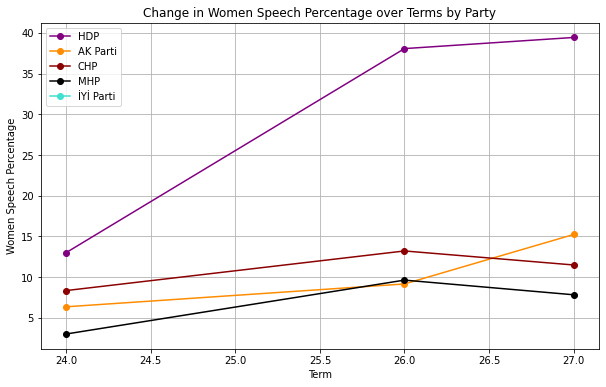

In [209]:
import matplotlib.pyplot as plt
df=merged_speech
party_colors = {
    'HDP': 'purple',
    'AK Parti': 'darkorange',
    'CHP': 'darkred',
    'MHP': 'black',
    'İYİ Parti': 'turquoise',
}
plt.figure(figsize=(10, 6))
for party, color in party_colors.items():
    party_data = df[df['vekil_party'] == party]
    plt.plot(party_data['term'], party_data['women_speech_percentage'], marker='o', label=party, color=color)

plt.xlabel('Term')
plt.ylabel('Women Speech Percentage')
plt.title('Change in Women Speech Percentage over Terms by Party')
plt.legend()
plt.grid(True)
plt.show()

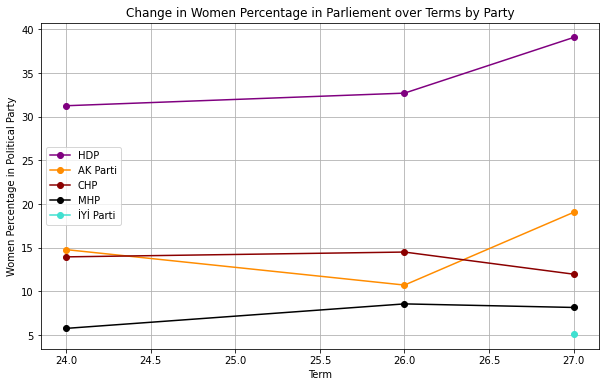

In [210]:
df=merged_cvs
plt.figure(figsize=(10, 6))
for party, color in party_colors.items():
    party_data = df[df['vekil_party'] == party]
    plt.plot(party_data['term'], party_data['women_percentage'], marker='o', label=party, color=color)

plt.xlabel('Term')
plt.ylabel('Women Percentage in Political Party')
plt.title('Change in Women Percentage in Parliement over Terms by Party')
plt.legend()
plt.grid(True)
plt.show()